In [1]:
import numpy as np
import pandas as pd

In [2]:
articles = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv')
customers = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv')
transactions_train = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [10]:
print(articles.shape)
print(customers.shape)
print(transactions_train.shape)

(105542, 25)
(1371980, 7)
(31788324, 5)


In [11]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [12]:
customers.isnull().sum()

()

In [13]:
transactions_train.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

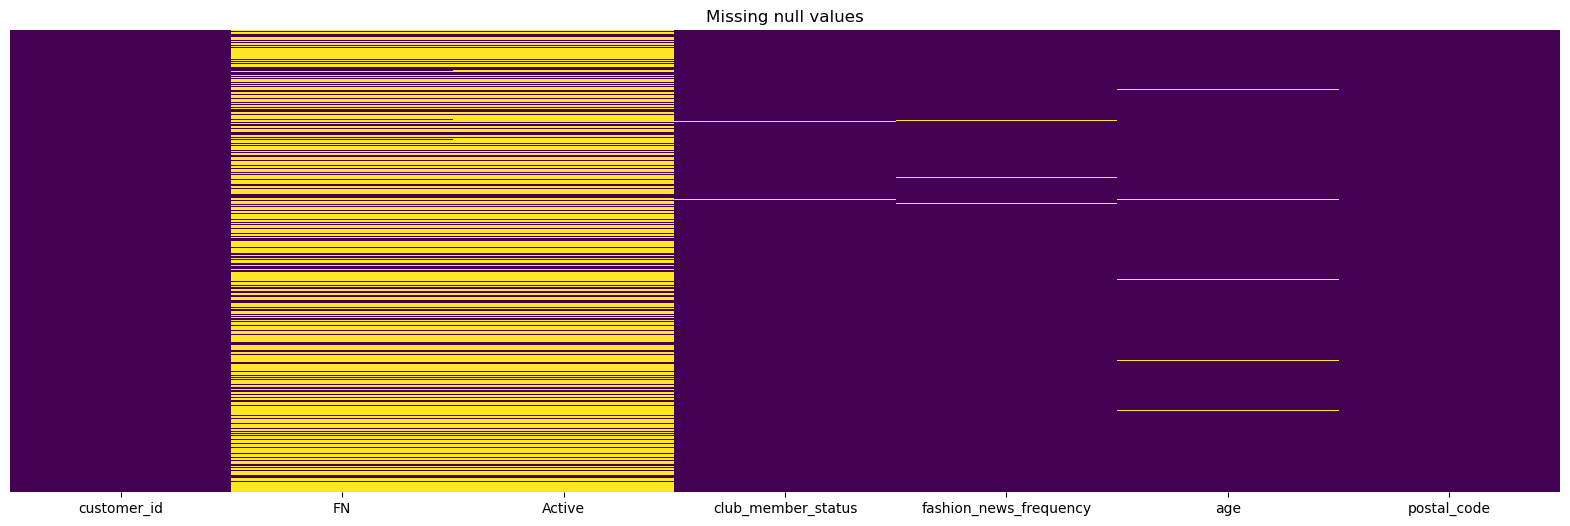

In [14]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(customers.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
matplotlib.pyplot.title("Missing null values")

In [15]:
customers['age'].mean()

36.386964565794

In [17]:
## use mean value of the age to deal with null value
customers['age']= customers['age'].fillna(customers['age'].mean())

In [18]:
customers['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [21]:
## Bin and classify the age column into three group 

customers['age_by_decade'] = pd.cut(x=customers['age'], bins=[ 10, 49, 69, 100], labels=['Young age', 'Medium age', 'Older age'])

<AxesSubplot:xlabel='age_by_decade', ylabel='count'>

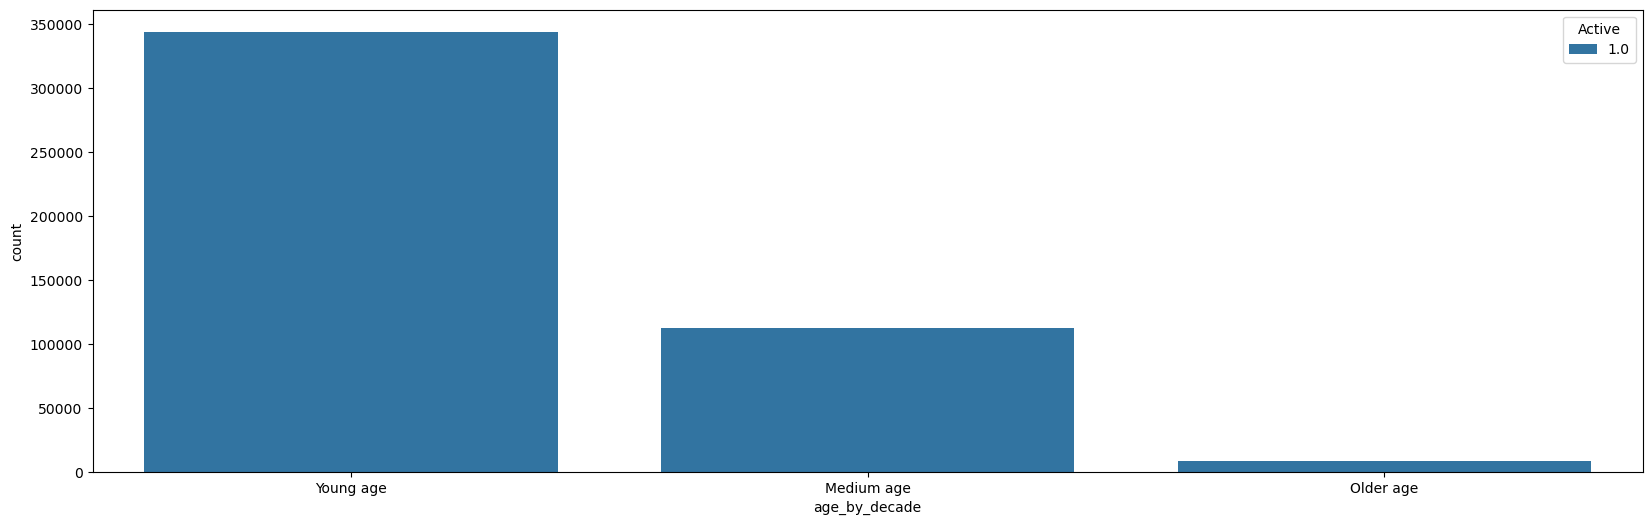

In [22]:
## find the number of each customer age groups
sns.countplot(data=customers, x="age_by_decade", hue="Active")

<AxesSubplot:xlabel='club_member_status', ylabel='count'>

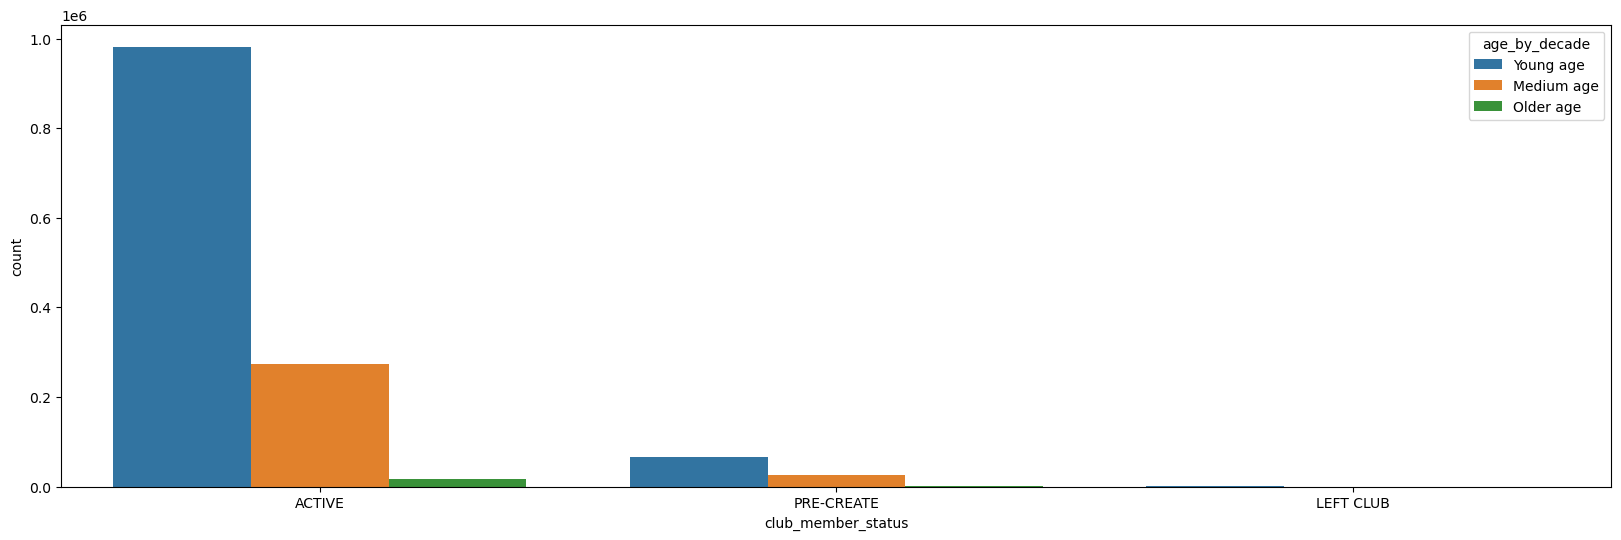

In [23]:
## number of the customer in different age group in all club status

import matplotlib.pyplot as plt

sns.countplot(data=customers, x= "club_member_status", hue="age_by_decade")

            Frequency
t_dat                
2018-09-20      48399
2018-09-21      47543
2018-09-22      17635
2018-09-23      52230
2018-09-24      45984
...               ...
2020-09-18      39284
2020-09-19      36796
2020-09-20      31489
2020-09-21      32130
2020-09-22      32866

[734 rows x 1 columns]


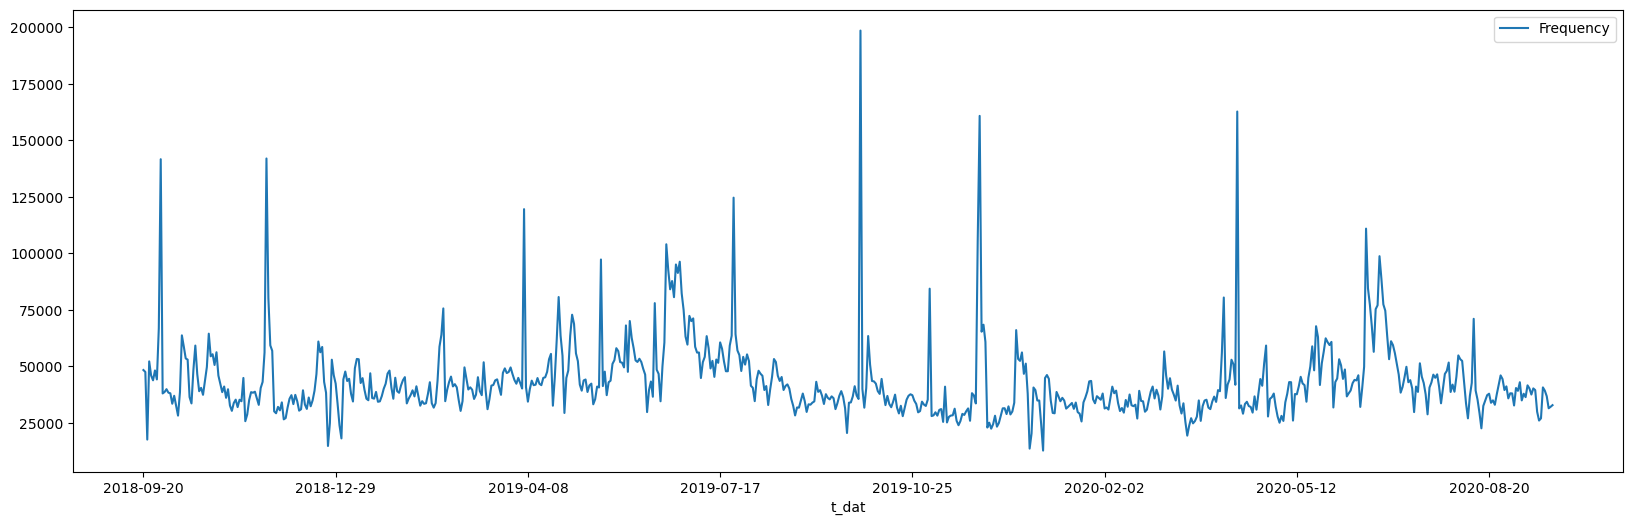

In [24]:
### find number of transaction each day  

tran_freq = pd.DataFrame(transactions_train.groupby(['t_dat']).size(), columns= ['Frequency'])

print(tran_freq)

## Plot transactions over time day by day from 2018-09-20 to 2020-09-22


from matplotlib import pyplot
tran_freq.plot()
pyplot.show()

In [32]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])

            Frequency
t_dat                
2018-09-20      48399
2018-09-21      47543
2018-09-22      17635
2018-09-23      52230
2018-09-24      45984
...               ...
2020-09-18      39284
2020-09-19      36796
2020-09-20      31489
2020-09-21      32130
2020-09-22      32866

[734 rows x 1 columns]


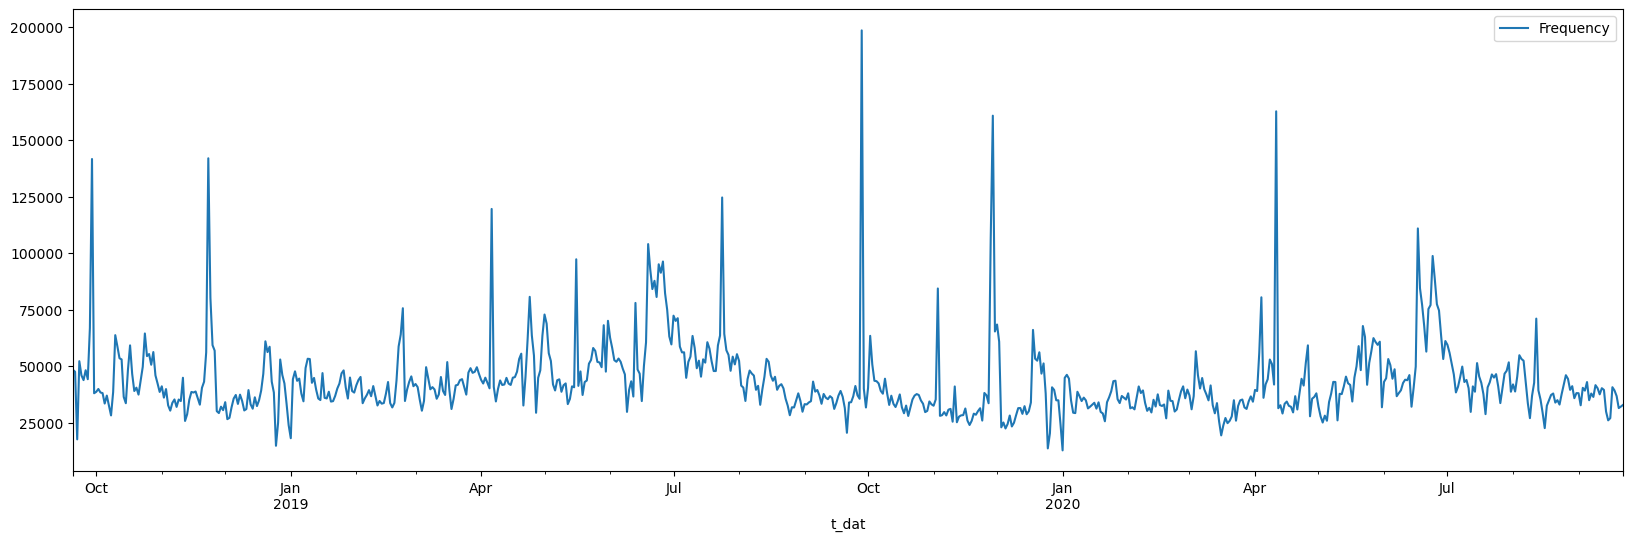

In [35]:
### find number of transaction each day  

tran_freq = pd.DataFrame(transactions_train.groupby(['t_dat']).size(), columns= ['Frequency'])

print(tran_freq)

## Plot transactions over time day by day from 2018-09-20 to 2020-09-22


from matplotlib import pyplot
tran_freq.plot()
pyplot.show()

In [37]:
tran_freq = tran_freq.reset_index(level=['t_dat'])
tran_freq.head()

,t_dat,Frequency
0,2018-09-20,48399
1,2018-09-21,47543
2,2018-09-22,17635
3,2018-09-23,52230
4,2018-09-24,45984


In [38]:
### find the year and months columns from date column

tran_freq['Year'] = pd.DatetimeIndex(tran_freq['t_dat']).year
tran_freq['Month'] = pd.DatetimeIndex(tran_freq['t_dat']).month
tran_freq['Month_Year'] = pd.to_datetime(tran_freq['t_dat']).dt.to_period('M')
 
tran_freq.head()

,t_dat,Frequency,Year,Month,Month_Year
0,2018-09-20,48399,2018,9,2018-09
1,2018-09-21,47543,2018,9,2018-09
2,2018-09-22,17635,2018,9,2018-09
3,2018-09-23,52230,2018,9,2018-09
4,2018-09-24,45984,2018,9,2018-09


Year        2018       2019       2020
Month                                 
1            NaN  1263471.0  1076354.0
2            NaN  1152412.0  1001859.0
3            NaN  1286750.0  1047752.0
4            NaN  1476454.0  1340882.0
5            NaN  1560319.0  1361815.0
6            NaN  1906202.0  1764507.0
7            NaN  1807494.0  1351502.0
8            NaN  1253530.0  1237192.0
9       594776.0  1227178.0   798269.0
10     1397040.0  1146772.0        NaN
11     1270619.0  1198033.0        NaN
12     1148827.0  1118315.0        NaN


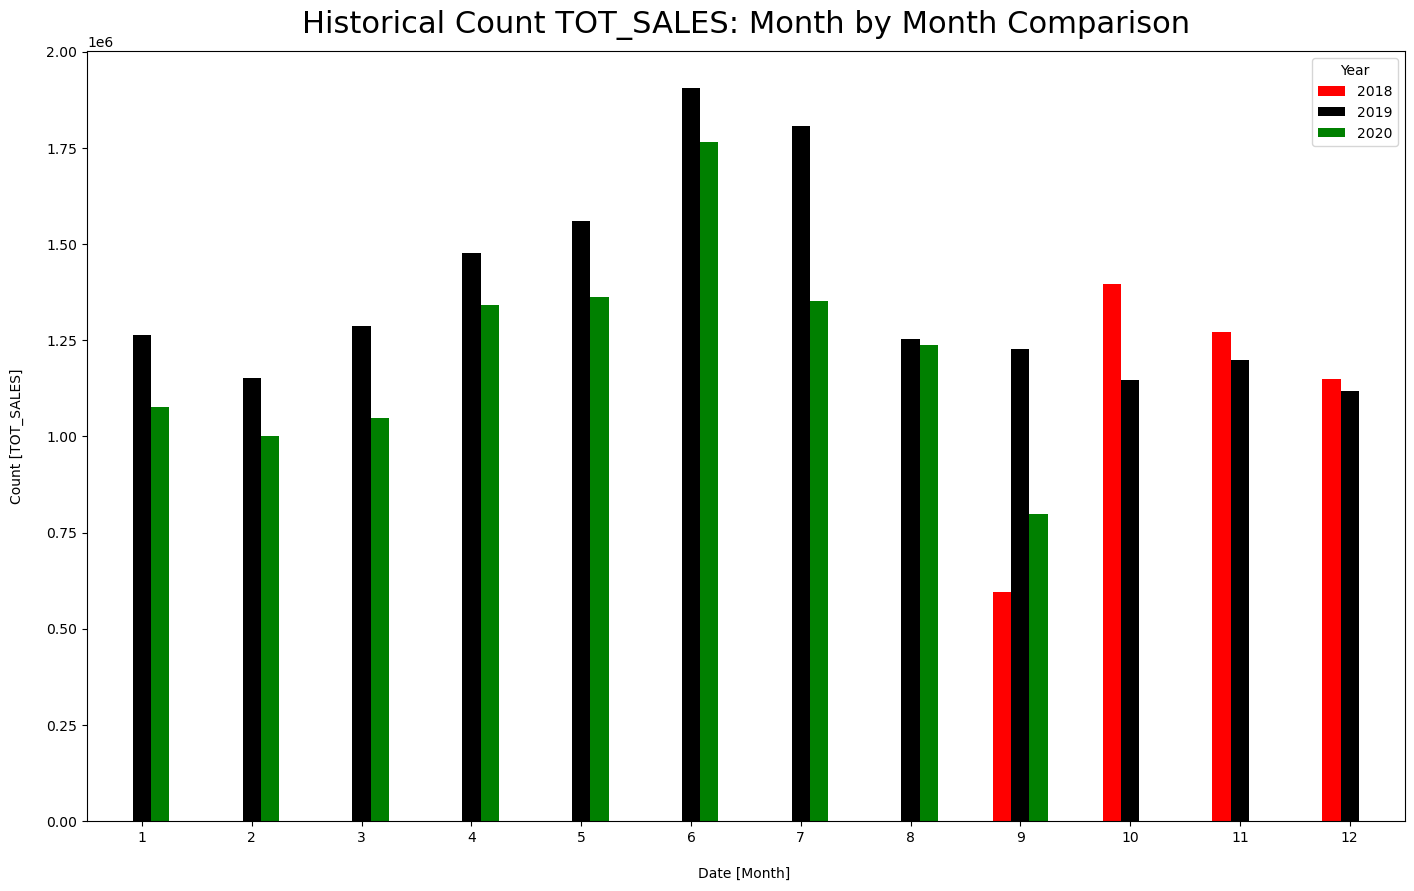

In [39]:
### find the total sales for each month in 2018 and 2019 

pv = pd.pivot_table(tran_freq, index='Month', columns= 'Year', values= 'Frequency', aggfunc='sum')

print(pv)

pv.plot(kind='bar', figsize=(17, 10), color=['red', 'black', 'green'], rot=0)                                       
plt.title("Historical Count TOT_SALES: Month by Month Comparison", y=1.013, fontsize=22)
plt.xlabel("Date [Month] ", labelpad=16)
plt.ylabel("Count [TOT_SALES]", labelpad=16);